# 6.4. Kategoryzacja wielowymiarowa

Znamy już teoretyczne podstawy metody K-Means, a także mamy wyrobione intuicje co do zbioru danych Titanic. W związku z tym, spróbujemy teraz pogrupować sobie nasze obserwacje. Docelowo chcielibyśmy stworzyć model, który podzieli pasażerów na tych, którzy przetrwali katastrofę oraz drugą grupę osób, która zginęła.

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_parquet("../data/titanic-preprocessed.parquet")
titanic_df.sample(n=5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count
17,1,2,Mr. Charles Eugene Williams,male,23.0,0,0,13.000,True,False,False,False,False,False,4
272,1,3,Miss. Hanora Healy,female,33.0,0,0,7.750,False,True,False,False,False,False,3
24,0,3,Miss. Torborg Danira Palsson,female,8.0,3,1,21.075,False,True,False,False,False,False,4
221,0,3,Mr. George Henry Green,male,51.0,0,0,8.050,True,False,False,False,False,False,4
742,0,3,Mr. Rossmore Edward Abbott,male,16.0,1,1,20.250,True,False,False,False,False,False,4


In [3]:
titanic_df.drop(columns=["Name"], inplace=True)
titanic_df.sample(n=5)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count
51,1,1,female,49.0,1,0,76.7292,False,False,True,False,False,False,6
807,0,3,male,39.0,0,0,24.1500,True,False,False,False,False,False,3
869,0,3,male,47.0,0,0,9.0000,True,False,False,False,False,False,4
469,1,2,female,33.0,1,2,27.7500,False,False,True,False,False,False,7
187,0,3,male,40.0,1,1,15.5000,True,False,False,False,False,False,3


In [4]:
titanic_df = pd.get_dummies(titanic_df)
titanic_df.sample(n=5)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count,Sex_female,Sex_male
291,0,3,24.0,0,0,8.8500,False,True,False,False,False,False,3,1,0
802,0,1,39.0,0,0,0.0000,True,False,False,False,False,False,4,0,1
395,0,2,46.0,0,0,26.0000,True,False,False,False,False,False,4,0,1
353,0,3,28.0,0,0,9.5000,True,False,False,False,False,False,5,0,1
528,0,3,17.0,0,0,7.2292,True,False,False,False,False,False,3,0,1


In [5]:
titanic_df.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count,Sex_female,Sex_male
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,-0.547835,0.325936,0.338202,0.084577,0.007880,-0.065374,0.231356,0.542152,-0.542152
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,0.139969,0.001317,-0.147985,0.083027,-0.108773,-0.030153,-0.217556,-0.129507,0.129507
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,0.196475,-0.269164,0.180689,-0.382306,0.082781,0.080077,0.095078,-0.091875,0.091875
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,-0.249202,0.086942,0.062597,0.349309,0.003721,-0.026812,0.158352,0.113249,-0.113249
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,-0.332799,0.104599,0.225185,0.267044,-0.042363,-0.022155,0.227005,0.244337,-0.244337
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,-0.182416,0.117362,0.104468,0.010473,0.030228,-0.023210,0.169528,0.181137,-0.181137
Mr.,-0.547835,0.139969,0.196475,-0.249202,-0.332799,-0.182416,1.000000,-0.595064,-0.474352,-0.254514,-0.104455,-0.096652,-0.333101,-0.866983,0.866983
Miss.,0.325936,0.001317,-0.269164,0.086942,0.104599,0.117362,-0.595064,1.000000,-0.205787,-0.110415,-0.045316,-0.041930,-0.173706,0.686363,-0.686363
Mrs.,0.338202,-0.147985,0.180689,0.062597,0.225185,0.104468,-0.474352,-0.205787,1.000000,-0.088017,-0.036123,-0.033425,0.686235,0.547129,-0.547129
Master.,0.084577,0.083027,-0.382306,0.349309,0.267044,0.010473,-0.254514,-0.110415,-0.088017,1.000000,-0.019382,-0.017934,-0.016814,-0.160870,0.160870


In [6]:
titanic_df.drop(columns="Sex_male", 
                inplace=True)
titanic_df.to_parquet("../data/titanic-final.parquet")

## Normalizacja danych

Nasz zbiór danych posługuje się zupełnie innymi jednostkami dla różnych kolumn. Wartość cech *Age* i *Fare* znacząco odstają swoimi wielkościami od pól binarnych. K-Means wykorzystuje odległość między punktami, przez co musimy dokonać normalizacji wszystkich wartości, aby uniknąć różnych wag poszczególnych zmiennych.

## Definicja całego łańcucha przekształceń

Potrzebujemy dokonać wspomnianej normalizacji oraz klastrowania naszych obserwacji. Stworzymy do tego celu tzw. *pipeline*.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
pipeline = Pipeline(steps=[
    ("scaling", StandardScaler()),
    ("clustering", KMeans(n_clusters=2, 
                          random_state=2019)),
])

In [9]:
import numpy as np

In [10]:
clusters = pipeline.fit_predict(
    titanic_df.drop(columns="Survived")
)
np.random.choice(clusters, size=10)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [11]:
titanic_df.assign(predicted=clusters) \
    .corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count,Sex_female,predicted
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,-0.547835,0.325936,0.338202,0.084577,0.007880,-0.065374,0.231356,0.542152,-0.554281
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,0.139969,0.001317,-0.147985,0.083027,-0.108773,-0.030153,-0.217556,-0.129507,0.085427
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,0.196475,-0.269164,0.180689,-0.382306,0.082781,0.080077,0.095078,-0.091875,0.261696
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,-0.249202,0.086942,0.062597,0.349309,0.003721,-0.026812,0.158352,0.113249,-0.311186
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,-0.332799,0.104599,0.225185,0.267044,-0.042363,-0.022155,0.227005,0.244337,-0.370779
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,-0.182416,0.117362,0.104468,0.010473,0.030228,-0.023210,0.169528,0.181137,-0.197184
Mr.,-0.547835,0.139969,0.196475,-0.249202,-0.332799,-0.182416,1.000000,-0.595064,-0.474352,-0.254514,-0.104455,-0.096652,-0.333101,-0.866983,0.942590
Miss.,0.325936,0.001317,-0.269164,0.086942,0.104599,0.117362,-0.595064,1.000000,-0.205787,-0.110415,-0.045316,-0.041930,-0.173706,0.686363,-0.619077
Mrs.,0.338202,-0.147985,0.180689,0.062597,0.225185,0.104468,-0.474352,-0.205787,1.000000,-0.088017,-0.036123,-0.033425,0.686235,0.547129,-0.493493
Master.,0.084577,0.083027,-0.382306,0.349309,0.267044,0.010473,-0.254514,-0.110415,-0.088017,1.000000,-0.019382,-0.017934,-0.016814,-0.160870,-0.264784


## Przeformułowanie problemu

Stworzyliśmy system klastrowania, który stał się klasyfikatorem płci. Nie do końca to było naszym zamiarem, w związku z tym usuniemy kolumny odpowiedzialne za kodowanie płci.

In [12]:
reduced_titanic_df = titanic_df \
    .drop(columns=["Sex_female", "Mrs.", "Miss.", "Mr."])
reduced_titanic_df.to_parquet("../data/titanic-reduced.parquet")

In [13]:
clusters = pipeline.fit_predict(
    reduced_titanic_df.drop(columns="Survived")
)
np.random.choice(clusters, size=10)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [14]:
titanic_df.assign(predicted=clusters) \
    .corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count,Sex_female,predicted
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,-0.547835,0.325936,0.338202,0.084577,0.007880,-0.065374,0.231356,0.542152,-0.020743
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,0.139969,0.001317,-0.147985,0.083027,-0.108773,-0.030153,-0.217556,-0.129507,-0.123875
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,0.196475,-0.269164,0.180689,-0.382306,0.082781,0.080077,0.095078,-0.091875,0.415510
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,-0.249202,0.086942,0.062597,0.349309,0.003721,-0.026812,0.158352,0.113249,-0.648957
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,-0.332799,0.104599,0.225185,0.267044,-0.042363,-0.022155,0.227005,0.244337,-0.667028
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,-0.182416,0.117362,0.104468,0.010473,0.030228,-0.023210,0.169528,0.181137,-0.142233
Mr.,-0.547835,0.139969,0.196475,-0.249202,-0.332799,-0.182416,1.000000,-0.595064,-0.474352,-0.254514,-0.104455,-0.096652,-0.333101,-0.866983,0.321641
Miss.,0.325936,0.001317,-0.269164,0.086942,0.104599,0.117362,-0.595064,1.000000,-0.205787,-0.110415,-0.045316,-0.041930,-0.173706,0.686363,-0.115299
Mrs.,0.338202,-0.147985,0.180689,0.062597,0.225185,0.104468,-0.474352,-0.205787,1.000000,-0.088017,-0.036123,-0.033425,0.686235,0.547129,0.023652
Master.,0.084577,0.083027,-0.382306,0.349309,0.267044,0.010473,-0.254514,-0.110415,-0.088017,1.000000,-0.019382,-0.017934,-0.016814,-0.160870,-0.631191


Kolejny raz, nie udało się nam stworzyć klastrów, które odpowiadałyby oczekiwaniom. Tym jednak różni się proces klastrowania od klasyfikacji - jeśli zlecamy algorytmowi oszukanie jakiegokolwiek podziału, to nie możemy oczekiwać, że będzie to ten specyficzny, którego poszukujemy.

## Wizualizacja relacji poszczególnych zmiennych

W ostatnim kroku zrzutujemy sobie pary zmiennych na płaszczyznę oraz wykorzystamy klastry do ich pokolorowania.

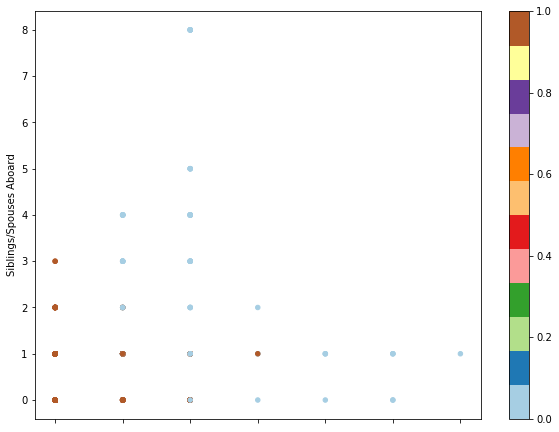

In [15]:
titanic_df.plot.scatter(x="Parents/Children Aboard", 
                        y="Siblings/Spouses Aboard",
                        c=clusters, cmap="Paired", 
                        figsize=(10.0, 7.5))